**LIVE FACE** **DETECTION**

In [ ]:
!pip install opencv-python opencv-python-headless

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# pretrain face detection model
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
# Function to detect faces and label them
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    person_count = 1  # Counter to label persons
    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Create label text
        label = f"Person {person_count}"
        person_count += 1

        # Put label above the rectangle
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (0, 255, 0), 2, cv2.LINE_AA)

    return img

In [ ]:
# Webcam capture using js
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64

<IPython.core.display.Javascript object>

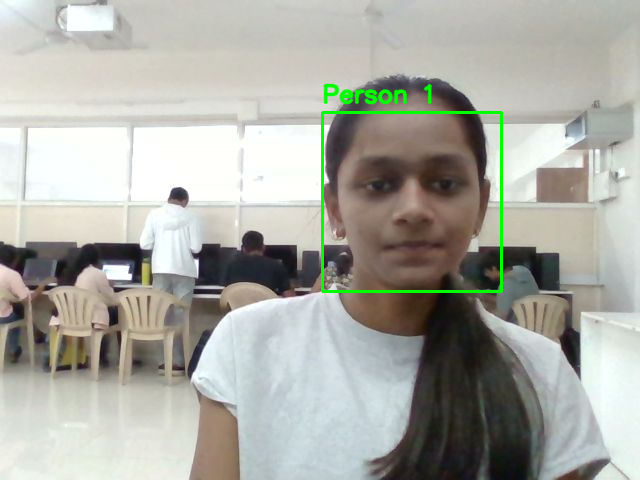

In [40]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        window.takePhoto = async function takePhoto(quality) { // Define in global scope
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize output to video size
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for capture click
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Step 4: Capture and detect face
filename = take_photo()
img = cv2.imread(filename)
img = detect_face(img)
cv2_imshow(img)